# 00 import libraries

In [17]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 01 MLP

## 1-1 load data

In [2]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## 1-2 explore data

In [5]:
# label 종류랑 각각의 개수 확인
print(np.unique(y_train, return_counts=True))
print(np.unique(y_test, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
      dtype=int64))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
      dtype=int64))


In [6]:
X_train[:16]

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [9]:
y_train[:16]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5, 3, 6, 1, 7], dtype=uint8)

In [10]:
images, labels = X_train[:16], y_train[:16]

Text(0.5, 1.0, 'Class: 5')

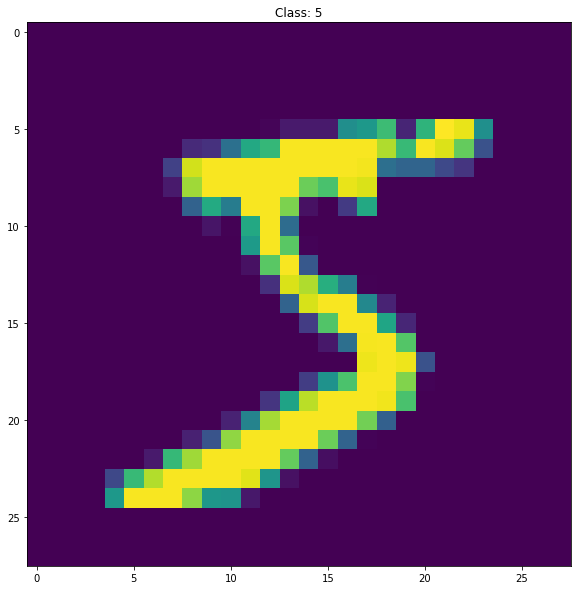

In [13]:
plt.figure(figsize=(10,10))
plt.imshow(images[0])
plt.title(f"Class: {labels[0]}")

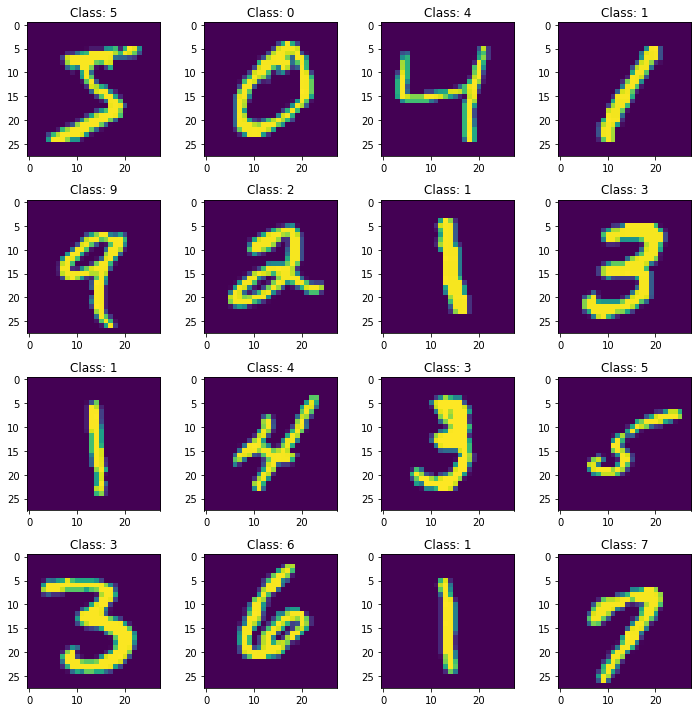

In [16]:
plt.figure(figsize=(10,10))
for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    plt.imshow(images[i])
    plt.title(f"Class: {labels[i]}")
plt.tight_layout()

## 1-3 모델 정의

In [19]:
28*28

784

In [22]:
class MLP(keras.Model):
    def __init__(self):
        # layer 정의
        ## 1. 꼭 해줘야 하는 줄!! (layer 정의와 상관 없음)
        super(MLP, self).__init__()
        ## 2. layer 정의 시작
        self.flatten = keras.layers.Flatten(input_shape=(28,28))
        self.dense1 = keras.layers.Dense(512, activation='relu')
        self.dense2 = keras.layers.Dense(256, activation='relu')
        self.out = keras.layers.Dense(10, activation='softmax')
        
    def call(self, x):
        # layer 이어붙이기! 여기서 x는 들어오는 데이터예요.
        x = self.flatten(x)
        x = self.dense1(x)
        x = self.dense2(x)
        return self.out(x)

In [23]:
# 모델 instance 생성!
model = MLP()

## 1-4 모델 학습

In [26]:
# loss, optimizer 생성!
learning_rate = 1e-4
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True) # multi-label classification 문제라서
optimizer = keras.optimizers.SGD(learning_rate=learning_rate)

In [27]:
# 모델 동작 확인!
model.compile(loss=loss, optimizer=optimizer, metrics=['accuracy'])
model.build(input_shape=(1, 28, 28, 1)) # (batch, height, width, channel) - batch는 전체 데이터를 쪼개는 단위, channel은 RGB (여기서는 greyscale이라서 channel이 한 개!)
model.summary()

Model: "mlp_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         multiple                  0         
                                                                 
 dense_1 (Dense)             multiple                  401920    
                                                                 
 dense_2 (Dense)             multiple                  131328    
                                                                 
 dense_3 (Dense)             multiple                  2570      
                                                                 
Total params: 535818 (2.04 MB)
Trainable params: 535818 (2.04 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
# 모델 학습!
hist = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10


c:\users\stell\appdata\local\programs\python\python38\lib\site-packages\keras\src\backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 9s 4ms/step - loss: 3.6476 - accuracy: 0.8554
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.0615 - accuracy: 0.9273
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6595 - accuracy: 0.9458
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4544 - accuracy: 0.9555
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3278 - accuracy: 0.9639
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2422 - accuracy: 0.9693
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1813 - accuracy: 0.9745
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1345 - accuracy: 0.9794
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1024 - accuracy: 0.9830
Epoch 10/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0747 - accurac

## 1-5 모델 성능 평가 및 학습 상황 확인

In [29]:
# 모델 성능 평가
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.6513 - accuracy: 0.9415


[0.6513496041297913, 0.9415000081062317]

In [31]:
hist.history['accuracy'] # 우리가 학습한 모델의 epoch 별 accuracy가 저장되어있음.

[0.8553833365440369,
 0.9273499846458435,
 0.945816695690155,
 0.9555333256721497,
 0.9639000296592712,
 0.9693499803543091,
 0.9745000004768372,
 0.9794166684150696,
 0.9829833507537842,
 0.9871666431427002]

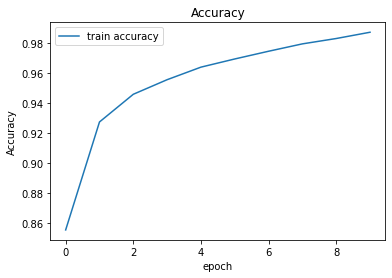

In [32]:
# accuracy curve (epoch 돌면서 accuracy가 얼마나 증가하는지?)
plt.figure(figsize=(6,4))
plt.plot(hist.history['accuracy'], label='train accuracy')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()

In [33]:
hist.history['loss'] # 우리가 학습한 모델의 epoch 별 loss가 저장되어있음.

[3.647571086883545,
 1.0615092515945435,
 0.6594842076301575,
 0.4543896019458771,
 0.3278057277202606,
 0.24220331013202667,
 0.18125765025615692,
 0.1345362812280655,
 0.10238852351903915,
 0.07466331124305725]

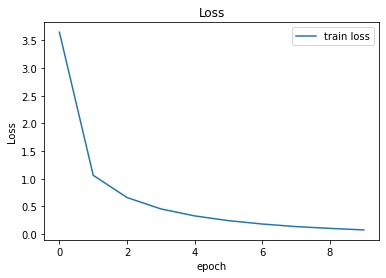

In [34]:
# loss curve (epoch 돌면서 loss가 얼마나 감소하는지?)
plt.figure(figsize=(6,4))
plt.plot(hist.history['loss'], label='train loss')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

# 02 CNN

In [35]:
import pathlib

## 2-1 load data

In [36]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [37]:
data_dir = keras.utils.get_file(origin=dataset_url,
                               fname='flower_photos',
                               untar=True)
data_dir = pathlib.Path(data_dir)

## 2-2 preprocessing

In [38]:
train_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

test_ds = keras.preprocessing.image_dataset_from_directory(
data_dir,
validation_split=0.2,
subset='training',
seed=2023,
image_size=(224, 224),
batch_size=32)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 2936 files for training.


## 2-3 data exploring

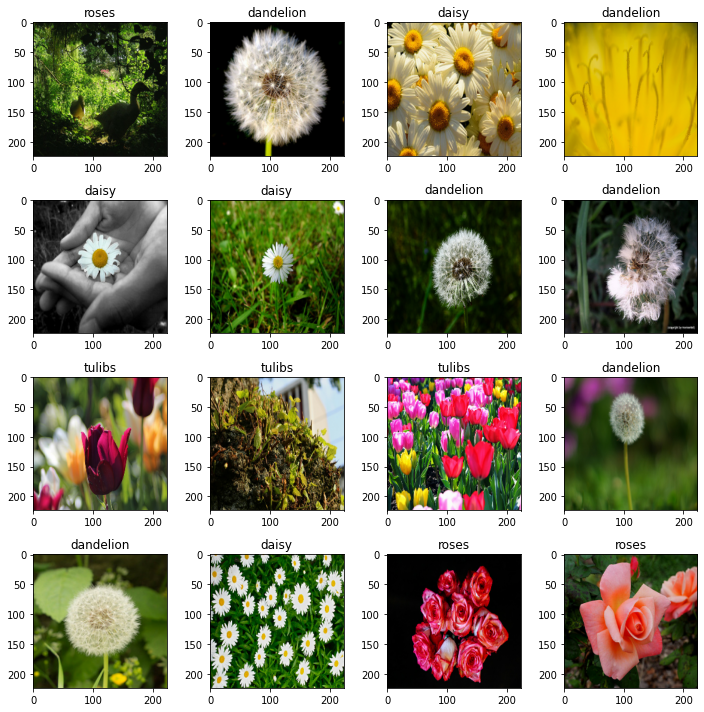

In [43]:
class_names = ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulibs']
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
plt.tight_layout()

In [44]:
## 2-4 모델 정의
class CNN(keras.Model):
    def __init__(self):
        # layer랑 관련 없음. 모델 정의할 때 꼭 해줘야 함!!
        super(CNN, self).__init__()
        
        # layer 정의 시작
        self.cnn1 = keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=(224,224,3))
        self.pool1 = keras.layers.MaxPooling2D((2,2))
        self.cnn2 = keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu', padding='same')
        self.pool2 = keras.layers.MaxPooling2D((2,2))
        
        self.flat = keras.layers.Flatten()
        self.fc1 = keras.layers.Dense(128, actitvation='relu')
        self.out = keras.layers.Dense(5, activation='softmax')
    
    def call(self,x):
        x = self.cnn1(x)
        x = self.pool1(x)
        x = self.cnn2(x)
        x = self.pool2(x)    
        x = self.flat(x)
        x = self.fc1(x)
        
        return self.out(x)

In [ ]:
## your code here ##